# Power   VS   Finesse 투수 비교

#### 투수의 유형을 나눌 때, Power pitcher와 Finesse pitcher로 구분하는 경우가 있다.
Power pitcher는 공의 정확도보다 속도에 집중해서 투구를 하는 유형의 투수 유형이고,   
반대로 Finess pitcher는 공의 속도보다 정확도에 집중해서 제구력을 높인 투수의 유형이다.   
   
두 유형을 PFR로 분류해서 기록을 살펴보자.   
   
**PFR = ( K + BB ) / IP**   
   
PFR이 평균보다 높으면 Power, 낮으면 Finesse로 구분한다.

### Data From   ( Lahman Basball Database )

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
pd.set_option('display.max_columns', 52)

In [3]:
# 선수 명단
player = pd.read_csv('People.csv')
player['fullName'] = player['nameFirst']+' '+player['nameLast']
player_id = player[['playerID', 'fullName', 'bats', 'throws']]
player_id.head()

,playerID,fullName,bats,throws
0,aardsda01,David Aardsma,R,R
1,aaronha01,Hank Aaron,R,R
2,aaronto01,Tommie Aaron,R,R
3,aasedo01,Don Aase,R,R
4,abadan01,Andy Abad,L,L


In [4]:
# 투수들의 경기 기록 
pitch = pd.read_csv('Pitching.csv')

In [14]:
pitch.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,0,0,78,43,23,0,11,1,NaN,7.96,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,0,0,792,361,132,4,37,13,NaN,4.50,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,0,0,3,8,3,0,0,0,NaN,27.00,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,1,0,639,295,103,3,31,15,NaN,4.35,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,0,0,27,20,10,0,3,0,NaN,10.00,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [6]:
# 2000년 이후의 투수들의 PFR 계산
over_2000 = pitch[pitch['yearID']>=2000]
pitch_sum = over_2000.groupby('playerID')['SO','BB','IPouts'].sum().reset_index()
pitch_sum['ip'] = pitch_sum['IPouts']/3
pitch_sum['pfr'] = (pitch_sum['SO']+pitch_sum['BB'])/pitch_sum['ip']
pitch_sum.head()

,playerID,SO,BB,IPouts,ip,pfr
0,aardsda01,340,183,1011,337.000000,1.551929
1,abadfe01,280,116,992,330.666667,1.197581
2,abbotpa01,318,271,1536,512.000000,1.150391
3,abreual01,2,2,4,1.333333,3.000000
4,abreubr01,16,10,36,12.000000,2.166667


In [7]:
# 2000년 이후 100이닝 이상 던진 투수들의 PFR 평균
pitch_sum.replace([np.inf, -np.inf], np.nan, inplace=True)
over_inn_100 = pitch_sum[pitch_sum['ip']>=100]
pfr_mean = over_inn_100['pfr'].mean()
pfr_mean

1.2020145524769754

In [8]:
# PFR 통계 수치
over_inn_100['pfr'].describe()

count    1598.000000
mean        1.202015
std         0.240661
min         0.627986
25%         1.025372
50%         1.188177
75%         1.353018
max         2.113886
Name: pfr, dtype: float64

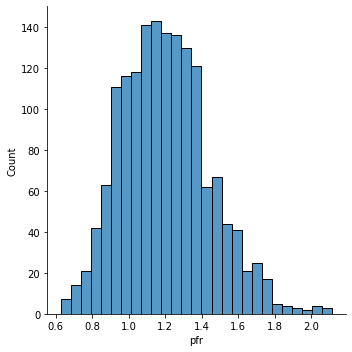

In [9]:
# 투수들의 PFR 분포도
sns.displot(over_inn_100['pfr'])

### PFR 상위 25%와 하위 25% 구분
   
극단적으로   
PFR 상위 25%(1.353 이상) = Power 투수   
PFR 하위 25%(1.025 이하) = Finesse 투수   
로 구분해서 기록을 비교해보자.


In [35]:
power = over_inn_100[over_inn_100['pfr']>1.353]
finesse = over_inn_100[over_inn_100['pfr']<1.025]

In [36]:
# id, 승리, 패배, 평균자책점, 안타, 홈런, 사구, 삼진, 폭투, 몸에 맞은 볼(Hit By Pitch), 이닝
col = ['playerID', 'W', 'L', 'ERA', 'H/9', 'HR/9', 'BB/9', 'SO/9', 'WP/9', 'HBP/9', 'IP']

In [45]:
power_total = pd.merge(power['playerID'], pitch, on='playerID')
power_total['IP'] = power_total['IPouts']/3
power_list = power_total.groupby('playerID').sum().reset_index()
power_list['ERA']=(power_list['ER']/power_list['IP'])*9
power_list['H/9']=(power_list['H']/power_list['IP'])*9
power_list['HR/9']=(power_list['HR']/power_list['IP'])*9
power_list['BB/9']=(power_list['BB']/power_list['IP'])*9
power_list['SO/9']=(power_list['SO']/power_list['IP'])*9
power_list['WP/9']=(power_list['WP']/power_list['IP'])*9
power_list['HBP/9']=(power_list['HBP']/power_list['IP'])*9
power_record = power_list[col]

In [46]:
finesse_total = pd.merge(finesse['playerID'], pitch, on='playerID')
finesse_total['IP'] = finesse_total['IPouts']/3
finesse_list = finesse_total.groupby('playerID').sum().reset_index()
finesse_list['ERA']=(finesse_list['ER']/finesse_list['IP'])*9
finesse_list['H/9']=(finesse_list['H']/finesse_list['IP'])*9
finesse_list['HR/9']=(finesse_list['HR']/finesse_list['IP'])*9
finesse_list['BB/9']=(finesse_list['BB']/finesse_list['IP'])*9
finesse_list['SO/9']=(finesse_list['SO']/finesse_list['IP'])*9
finesse_list['WP/9']=(finesse_list['WP']/finesse_list['IP'])*9
finesse_list['HBP/9']=(finesse_list['HBP']/finesse_list['IP'])*9
finesse_record = finesse_list[col]

In [50]:
power_mean_record = power_record.mean().reset_index().rename(columns={0: 'power'})
finesse_mean_record = finesse_record.mean().reset_index().rename(columns={0: 'finesse'})
p_vs_f = pd.merge(power_mean_record, finesse_mean_record, on='index')
p_vs_f

,index,power,finesse
0,W,23.940000,45.160401
1,L,22.327500,45.671679
2,ERA,4.013293,4.621017
3,H/9,7.970942,9.828303
4,HR/9,1.041686,1.146776
5,BB/9,4.093281,2.884051
6,SO/9,9.549107,5.441171
7,WP/9,0.518834,0.258286
8,HBP/9,0.391868,0.360751
9,IP,414.153333,793.891395


분류된 두 집단은 같은 %로 나누었기 때문에(상위 25%, 하위 25%) 인원 수는 같다.   
그럼에도 finesse 유형의 투수가 이닝이 훨씬 더 많았다.   
finesse 유형의 투수가 선발투수인 경우가 더 많다고 해석할 수 있다.

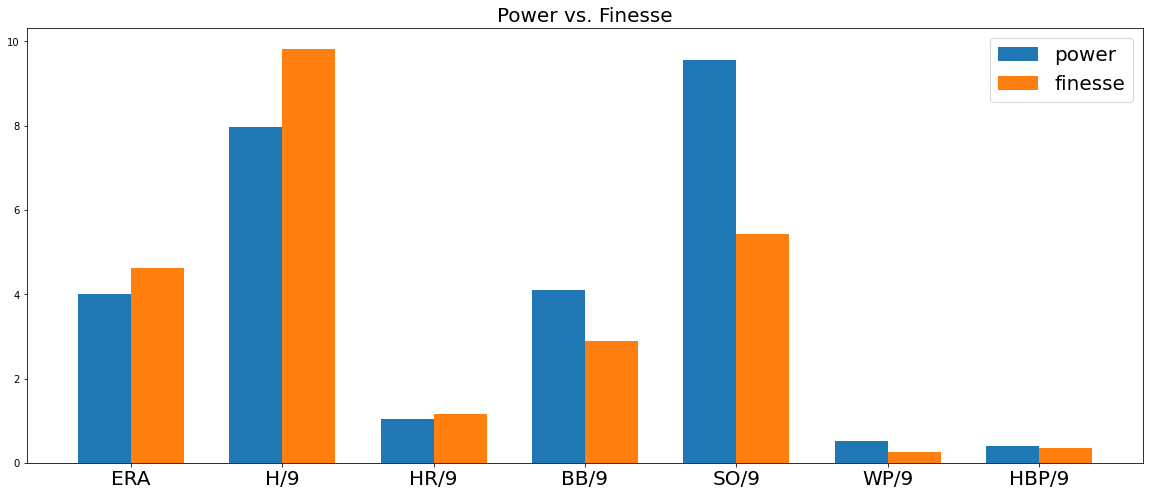

In [80]:
pf_plot = p_vs_f.iloc[2:9]
plt.figure(figsize=(20,8))
x = np.arange(len(pf_plot))
width=0.35
plt.bar(x-width/2, pf_plot['power'], label='power', width=0.35)
plt.bar(x+width/2, pf_plot['finesse'], label='finesse', width=0.35)
plt.legend(prop={'size': 20})
plt.xticks(x, labels=pf_plot['index'], size=20)
plt.title('Power vs. Finesse', size=20)
plt.show()

### 비교
ERA와 피안타, 피홈런 등 전체적으로 Power 유형 투수의 성적이 좋게 나타났다.   
삼진 아웃 수는 Power 유형이 압도적으로 높았으며, 반대로 사구, 폭투 또한 Power 유형이 더 많았다.

### 추가
투수의 구속과 관련된 데이터가 없어서 구속을 비교하지 못했다.   
Power 유형의 투수가 구속이 더 높을 것으로 예상되지만, 그 차이가 어느정도인지 확인하고 싶었는데 아쉽다.